In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [0]:
learning_rate = 0.01 
training_epoch = 20 
batch_size = 100 
n_hidden = 256 
n_input = 28 * 28

In [0]:
X = tf.placeholder(tf.float32, [None, n_input])
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [0]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [0]:
cost = tf.reduce_mean(tf.pow(X-decoder, 2))

In [9]:
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
  total_cost = 0
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, cost_val = sess.run([optimizer, cost],
                          feed_dict={X:batch_xs})
    total_cost += cost_val
    
  print('Epoch:', '%04d' % (epoch + 1),
        'Avg. cost=', '{:.4f}'.format(total_cost / total_batch))
  
print('최적화 완료')

Epoch: 0001 Avg. cost= 0.1919
Epoch: 0002 Avg. cost= 0.0597
Epoch: 0003 Avg. cost= 0.0522
Epoch: 0004 Avg. cost= 0.0475
Epoch: 0005 Avg. cost= 0.0440
Epoch: 0006 Avg. cost= 0.0421
Epoch: 0007 Avg. cost= 0.0395
Epoch: 0008 Avg. cost= 0.0374
Epoch: 0009 Avg. cost= 0.0360
Epoch: 0010 Avg. cost= 0.0341
Epoch: 0011 Avg. cost= 0.0336
Epoch: 0012 Avg. cost= 0.0325
Epoch: 0013 Avg. cost= 0.0320
Epoch: 0014 Avg. cost= 0.0318
Epoch: 0015 Avg. cost= 0.0315
Epoch: 0016 Avg. cost= 0.0313
Epoch: 0017 Avg. cost= 0.0311
Epoch: 0018 Avg. cost= 0.0308
Epoch: 0019 Avg. cost= 0.0307
Epoch: 0020 Avg. cost= 0.0305
최적화 완료


In [12]:
sample_size = 10
samples = sess.run(decoder,
                  feed_dict = {X:mnist.test.images[:sample_size]})
samples

array([[0.0000000e+00, 1.7881393e-07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.2782555e-07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.3113022e-06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 4.3213367e-06, ..., 4.1425228e-06,
        8.9406967e-08, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.2814999e-06, 0.0000000e+00]], dtype=float32)

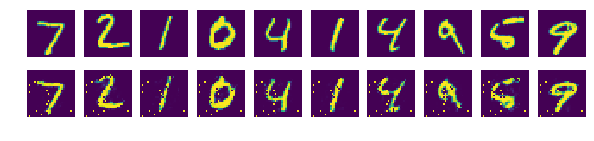

In [15]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))
for i in range(sample_size):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
  ax[1][i].imshow(np.reshape(samples[i], (28,28)))
  
plt.show()